In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay, classification_report


In [4]:
df = pd.read_csv(r"C:\Users\chist\Desktop\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

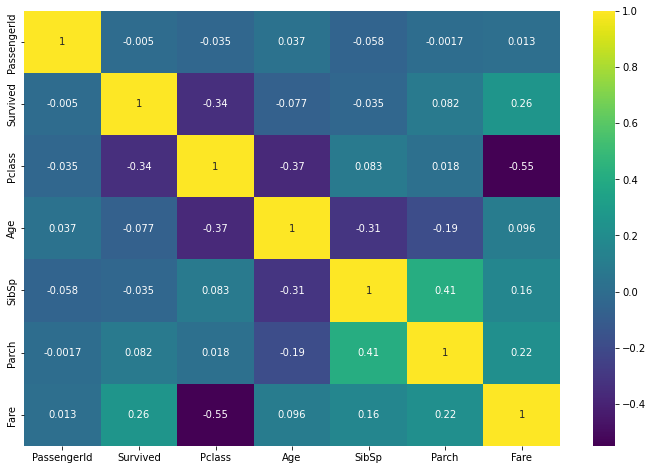

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
sum(df['Cabin'].isnull())

687

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [13]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [14]:
df = df.drop([61, 829], axis=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [16]:
# We have 177 passengers with no value in Age column

df[df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [17]:
# ==============================================================================================================================
# ==============================================================================================================================
# ==============================================================================================================================
# ==============================================================================================================================
# ==============================================================================================================================

In [18]:
# Now we`ll find out the age of those 177 passengers 

In [19]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [20]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Age', axis=1)
y = df['Age']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [22]:
linear_model = LinearRegression()
linear_model.fit(scaled_X_train, y_train)
preds = linear_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test,preds) 
MSE = mean_squared_error(y_test,preds)
RMSE = np.sqrt(MSE)

print(MAE, RMSE)

10.208014826206094 12.727335985640002


In [23]:
KNN_model = KNeighborsRegressor()

param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,15,20,30]}


def stats2(model):
    
    grid_model = GridSearchCV(model, param_grid=param_grid).fit(scaled_X_train, y_train)
    preds = grid_model.predict(scaled_X_test)
    
    MAE = mean_absolute_error(y_test,preds) 
    MSE = mean_squared_error(y_test,preds)
    RMSE = np.sqrt(MSE)
    
    print()
    print(f'best params are: {grid_model.best_params_}')
    print()
    print(MAE, RMSE)
    
stats2(KNN_model)


best params are: {'n_neighbors': 20}

10.101461538461539 12.710883166979995


In [24]:
svr_model = SVR()

param_grid = {'degree': [2,3],
              'C':[1,2,5,8,10,15]}

stats2(svr_model)


best params are: {'C': 10, 'degree': 2}

9.493553293514376 12.216387749528252


In [25]:
tree_model = DecisionTreeRegressor()

param_grid = {'max_depth':[2,3,5,8,13,21],
              'min_samples_split':[2,5,13,21,34]}

stats2(tree_model)


best params are: {'max_depth': 5, 'min_samples_split': 21}

9.636699237353417 12.261143718860994


In [26]:
ada_model = AdaBoostRegressor()

param_grid = {'n_estimators':[50,75,100,128,256],
              'learning_rate':[0.001,0.1,0.5,1.0,2.0,5.0,8.0,13.0]}

stats2(ada_model)


best params are: {'learning_rate': 0.001, 'n_estimators': 128}

9.552018576711657 12.153872015311373


In [27]:
GB_model = GradientBoostingRegressor()

param_grid = {'n_estimators': [50,100,128,150,200],
              'learning_rate':[0.1,0.03,0.05,0.04,0.2],
              'max_depth': [3,4,5]}

stats2(GB_model)


best params are: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

9.06882273831641 11.511300942427033


In [28]:
RF_model = RandomForestRegressor()

param_grid = {'max_depth':[8,13],
              'min_samples_split':[18,19,20,21,22,23,24,25]}

stats2(RF_model)


best params are: {'max_depth': 8, 'min_samples_split': 19}

9.447861331582189 12.03329298341313


In [29]:
# the best model is GradientBoostingRegressor:

GB_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=100)
GB_model.fit(X_train, y_train)
preds = GB_model.predict(X_test)

MAE = mean_absolute_error(y_test,preds) 
MSE = mean_squared_error(y_test,preds)
RMSE = np.sqrt(MSE)

print(MAE, RMSE)

9.06882273831641 11.511300942427033


In [30]:
# Now let`s fit the model on whole data

GB_model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05)

In [31]:
df = pd.read_csv(r"C:\Users\chist\Desktop\titanic\train.csv")
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = df.drop([61, 829], axis=0)

In [32]:
for_pred = df[df['Age'].isnull()].drop('Age', axis=1)
for_pred

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
5,0,3,male,0,0,8.4583,Q
17,1,2,male,0,0,13.0000,S
19,1,3,female,0,0,7.2250,C
26,0,3,male,0,0,7.2250,C
28,1,3,female,0,0,7.8792,Q
...,...,...,...,...,...,...,...
859,0,3,male,0,0,7.2292,C
863,0,3,female,8,2,69.5500,S
868,0,3,male,0,0,9.5000,S
878,0,3,male,0,0,7.8958,S


In [33]:
# Now predict the age of 177 passengers

for_pred = pd.get_dummies(for_pred, drop_first=True)

final_preds = GB_model.predict(for_pred)
final_preds

array([32.40899158, 30.98770246, 22.06856827, 28.68635817, 22.29449359,
       29.24798801, 35.55644259, 23.25894375, 23.33524084, 28.54462627,
       29.24798801, 30.86281113, 23.25894375, 21.5561341 , 40.62153544,
       46.44722973, 14.28837961, 29.24798801, 29.24798801, 22.29449359,
       29.24798801, 29.24798801, 29.24798801, 25.5362867 , 21.49055508,
       29.24798801, 34.32992026, 16.01627627, 25.50880482, 29.25402343,
       28.19036971, 14.94069987, 34.19063806, 46.69802817,  7.19505247,
       15.86939108, 34.69567516, 42.90253339, 20.90049128, 34.32992026,
       23.25894375, 14.94069987, 32.42425337, 29.24798801,  7.30535236,
       27.98735086, 26.53768788, 20.90049128, 29.25402343, 38.23856478,
       34.32992026, 29.21629065, 46.44722973, 23.25894375, 33.01034382,
       46.69802817, 46.44722973, 40.77012659, 23.25894375, 21.1862148 ,
       29.14827839, 29.24798801, 34.35239723, 14.94069987, 18.5734979 ,
       36.05755219, 29.24798801, 23.19826501, 47.0914823 , 28.68

In [34]:
# And fill the age gaps with predicted data

missed_values = df['Age'].isna()
df.loc[missed_values, 'Age'] = final_preds

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [35]:
# Now when we have whole dataset of 889 rows without NaN values in Age columns
# let`s predict the survival

df = pd.get_dummies(df, drop_first=True)
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_log = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)  
C = np.logspace(0,10,20)        

param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

def statistics(model):
    
    grid_model = GridSearchCV(model, param_grid=param_grid).fit(scaled_X_train,y_train)
    preds = grid_model.predict(scaled_X_test)
    print()
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)
    print(grid_model.best_params_)


              precision    recall  f1-score   support

           0       0.88      0.85      0.86       119
           1       0.71      0.76      0.74        59

    accuracy                           0.82       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.82      0.82       178

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l2'}


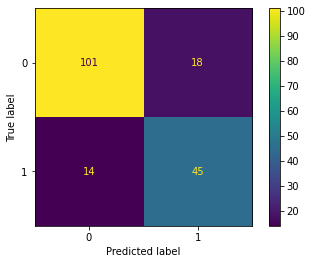

In [36]:
statistics(model_log)


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       119
           1       0.80      0.75      0.77        59

    accuracy                           0.85       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

{'C': 5.0, 'kernel': 'rbf'}


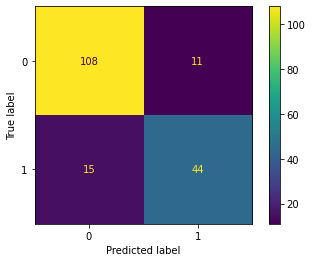

In [37]:
svc_model = SVC(random_state=47)

param_grid = {'C': np.linspace(0.001,5,20),
              'kernel': ['rbf', 'linear', 'poly']}

statistics(svc_model)

C:\Users\chist\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chist\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chist\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only ava


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       119
           1       0.77      0.80      0.78        59

    accuracy                           0.85       178
   macro avg       0.83      0.84      0.84       178
weighted avg       0.86      0.85      0.85       178

{'bootstrap': True, 'max_features': 4, 'n_estimators': 128, 'oob_score': True}


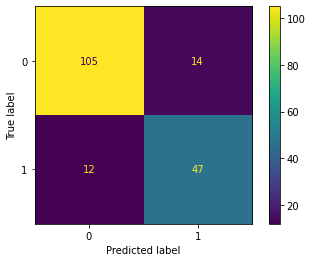

In [38]:
rand_forest_model = RandomForestClassifier(random_state=47)

param_grid = {'n_estimators': [64,100,128,200],
              'max_features': [2,3,4],
              'bootstrap': [True,False],
              'oob_score': [True,False]}

statistics(rand_forest_model)


              precision    recall  f1-score   support

           0       0.89      0.88      0.89       119
           1       0.77      0.78      0.77        59

    accuracy                           0.85       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

{'n_estimators': 15}


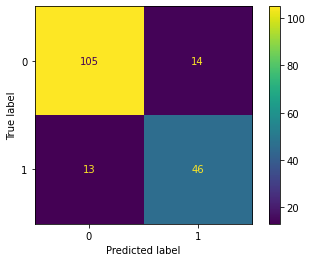

In [39]:
ada_model = AdaBoostClassifier(random_state=47)

param_grid = {'n_estimators': np.arange(5,100,2)}

statistics(ada_model)


              precision    recall  f1-score   support

           0       0.91      0.88      0.90       119
           1       0.78      0.83      0.80        59

    accuracy                           0.87       178
   macro avg       0.85      0.86      0.85       178
weighted avg       0.87      0.87      0.87       178

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


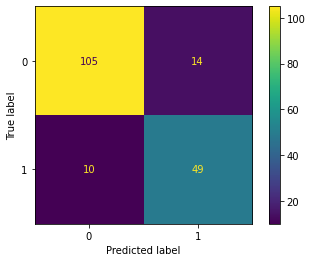

In [40]:
gbc_model = GradientBoostingClassifier(random_state=47)

param_grid = {'n_estimators': [50,100],
              'learning_rate':[0.1, 0.05, 0.2],
              'max_depth': [3,4,5,6]}

statistics(gbc_model)


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       119
           1       0.78      0.71      0.74        59

    accuracy                           0.84       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.83      0.84      0.84       178

{'n_neighbors': 10}


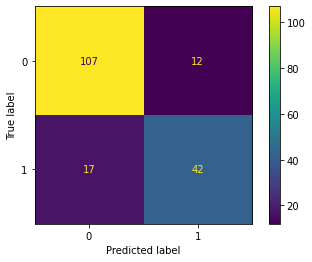

In [41]:
param_grid = {'n_neighbors': [7,8,9,10]}

KNN_model = KNeighborsClassifier()

statistics(KNN_model)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       119
           1       0.78      0.83      0.80        59

    accuracy                           0.87       178
   macro avg       0.85      0.86      0.85       178
weighted avg       0.87      0.87      0.87       178



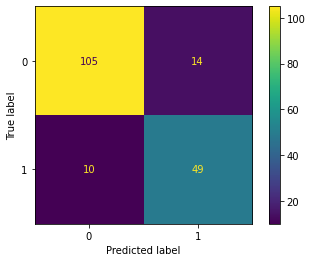

In [45]:
# the best model is GradientBoostingClassifier:

gbc_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 50, random_state=47)
gbc_model.fit(scaled_X_train, y_train)
preds = gbc_model.predict(scaled_X_test)

print(classification_report(y_test, preds))
ConfusionMatrixDisplay.from_estimator(gbc_model, scaled_X_test, y_test)

In [46]:
# Now let`s load test data and predict the age of passengers

df_for_test = pd.read_csv(r"C:\Users\chist\Desktop\titanic\test.csv")
df_for_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
df_for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
df_for_test = df_for_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_for_test = df_for_test.dropna()
df_for_test.info()

df_for_test = pd.get_dummies(df_for_test, drop_first=True)
X = df_for_test.drop('Age', axis=1)
y = df_for_test['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

GB_model = GradientBoostingRegressor()

param_grid = {'n_estimators': [50,100,128,150,200],
              'learning_rate':[0.1,0.03,0.05,0.04,0.2],
              'max_depth': [3,4,5]}

grid_model = GridSearchCV(GB_model, param_grid=param_grid).fit(scaled_X_train, y_train)
preds = grid_model.predict(scaled_X_test)
    
MAE = mean_absolute_error(y_test,preds) 
MSE = mean_squared_error(y_test,preds)
RMSE = np.sqrt(MSE)
    
print()
print(f'best params are: {grid_model.best_params_}')
print()
print(MAE, RMSE)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    object 
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.7+ KB

best params are: {'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 50}

8.856459905469631 10.71574975170048


In [49]:
GB_model.fit(X, y)

df_for_test = pd.read_csv(r"C:\Users\chist\Desktop\titanic\test.csv")
df_for_test = df_for_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [50]:
for_pred = df_for_test[df_for_test['Age'].isnull()].drop('Age', axis=1)
for_pred = pd.get_dummies(for_pred, drop_first=True)

final_preds = GB_model.predict(for_pred)
final_preds

array([25.52930852, 38.03175841, 26.16915647, 16.21549239, 24.08851556,
       22.5596296 , 40.17338769, 25.88199375, 28.72677525, 29.23795614,
       30.32915857, 24.72641639, 25.52930852, 38.71114779, 24.73545703,
       25.24409292, 25.35698987, 24.72641639, 25.88199375, 25.88199375,
       24.72641639, 25.24409292, 22.78377602, 27.11646564, 25.88199375,
       26.343563  , 39.13558866, 24.0182479 , 39.85290675, 40.17338769,
       25.52930852, 24.45714545, 30.44627179, 37.59284622, 26.50448238,
       25.60721568, 25.88199375, 14.00459911, 40.44272234, 24.08851556,
       26.34934894, 40.44272234, 26.17874476, 25.41641157, 24.72641639,
       19.41887379, 25.24409292, 26.0543124 , 25.52930852, 17.89779258,
       23.06723733, 26.50448238, 25.88199375, 25.52930852, 45.68448551,
       26.50448238, 24.08851556, 25.88199375, 26.55350196, 24.90641878,
       25.24409292, 28.07513726, 25.60721568, 24.72641639, 37.82431108,
       25.60721568, 26.16915647, 33.72296154, 25.24409292, 27.29

In [51]:
# Now fill the age gaps with predicted data for Test data

missed_values = df_for_test['Age'].isna()
df_for_test.loc[missed_values, 'Age'] = final_preds

df_for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [52]:
# Let`s fill the missed value in Fare column with Fare`s mean

df_for_test = df_for_test.fillna(df_for_test['Fare'].mean())
df_for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [53]:
df_for_test = pd.get_dummies(df_for_test, drop_first=True)
scaled_final_data = scaler.fit_transform(df_for_test)

preds = gbc_model.predict(scaled_final_data)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
len(preds)

418

In [55]:
df_for_test = pd.read_csv(r"C:\Users\chist\Desktop\titanic\test.csv")
df_for_test['Survived'] = preds

In [56]:
df_for_test = df_for_test.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
df_for_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
df_for_test.to_csv('Titanic_predictions_savitarus.csv', index=False)